In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
import pickle

In [54]:
def read_file(dataset):
	df = pd.read_excel (dataset)
	print(df.shape)
	df['STATUS'] = df['STATUS'].apply(lambda x: x.strip().lower())
	return df

In [55]:
FILE_TRAIN = 'train.xlsx'
FILE_TEST = 'test.xlsx'

In [56]:
df_train = read_file(FILE_TRAIN)
df_test = read_file(FILE_TEST)

(355, 10)
(191, 10)


In [57]:
target_encoder = LabelEncoder()
df_train['Target'] = target_encoder.fit_transform(df_train['STATUS' ])
df_test['Target'] = target_encoder.transform(df_test[ 'STATUS' ])

In [58]:
x_train = df_train.drop(['NISN', 'NAMA', 'Jenis Kelamin', 'USIA', 'STATUS', 'Target'], axis=1)
y_train = df_train[ 'Target' ]

print(x_train)

x_test = df_test.drop(['NISN', 'NAMA', 'Jenis Kelamin', 'USIA', 'STATUS', 'Target'], axis=1)
y_test = df_test['Target']

     RAPOR SMT1  RAPOR SMT2  RAPOR SMT3  RAPOR SMT4  RAPOR SMT5
0            91          90          88          82          91
1            83          90          90          91          86
2            90          88          91          88          74
3            81          82          83          74          78
4            82          83          80          74          79
..          ...         ...         ...         ...         ...
350          87          90          93          94          94
351          90          92          92          92          93
352          90          91          93          93          94
353          90          91          92          93          91
354          92          92          93          94          92

[355 rows x 5 columns]


In [59]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(x_train, y_train)
model.score(x_train, y_train)
predicted= model.predict(x_test)

accuracy = accuracy_score(predicted, y_test) * 100
print('Akurasi pada Algoritma Decision Tree menggunakan Hold-out dengan persentase 70:30 = %s' % accuracy)

Akurasi pada Algoritma Decision Tree menggunakan Hold-out dengan persentase 70:30 = 95.81151832460732


In [60]:
clf = DecisionTreeClassifier()

clf.fit(x_train, y_train)
print(clf.fit(x_train, y_train))

DecisionTreeClassifier()


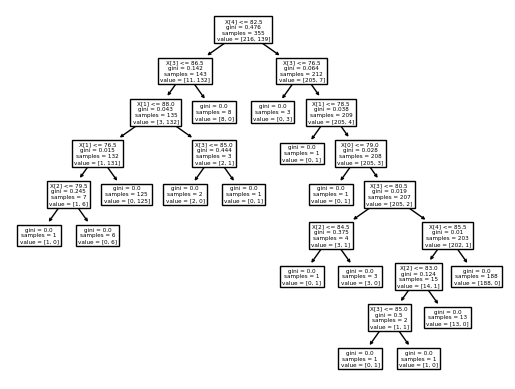

In [61]:
tree.plot_tree(clf);

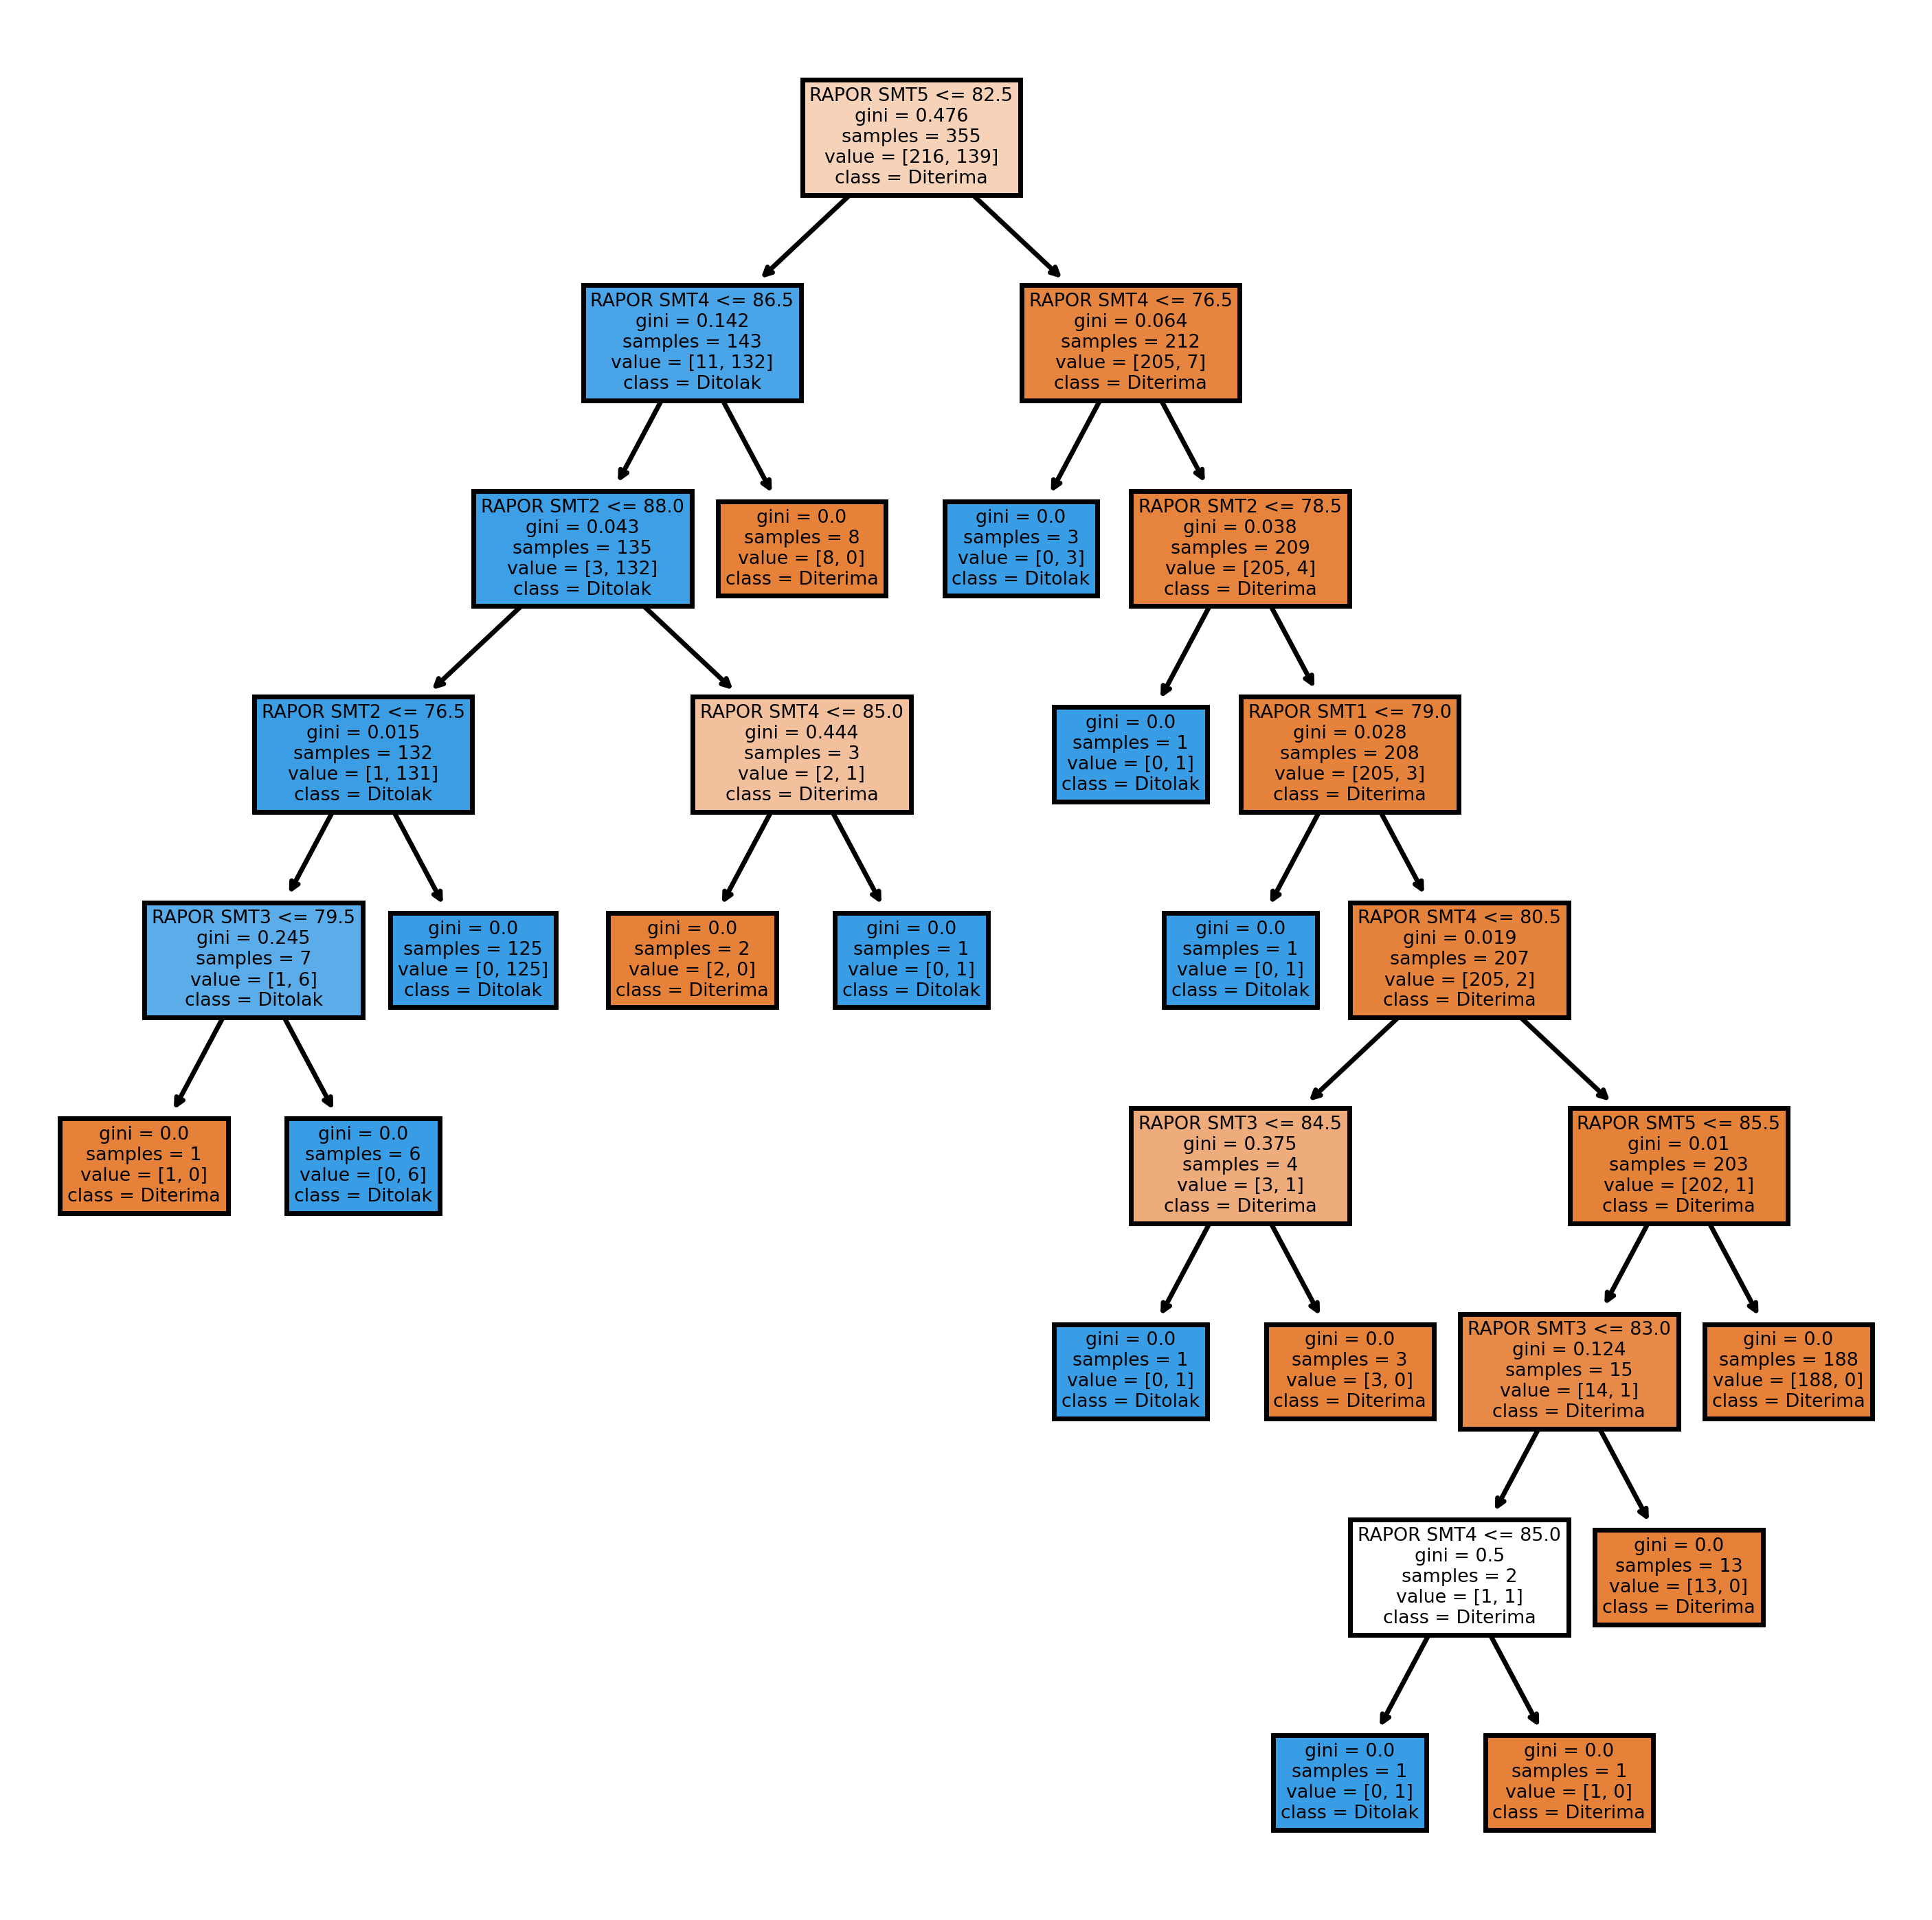

In [62]:
fn=['RAPOR SMT1', 'RAPOR SMT2','RAPOR SMT3','RAPOR SMT4','RAPOR SMT5',]
cn=['Diterima', 'Ditolak']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=500)

plot_tree(clf, feature_names = fn, class_names=cn, filled = True);
# fig.savefig('image.png')

In [63]:
classifier = DecisionTreeClassifier()

In [64]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [66]:
pickle.dump(classifier, open("model.pkl", "wb"))